In [9]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Carga de datos y división train/test


Realizamos la separación para obtener los dos subconjuntos: train y test, así como nos quedamos con las columnas que nos parecen relevantes. 

In [10]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv("./data/airbnb-listings-extract.csv", sep=";")
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./data/airbnb-listings-extract_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnb-listings-extract_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

house_data = pd.read_csv('./data/airbnb-listings-extract_train.csv', sep=';', decimal='.')
columnas_a_conservar = [
"Smart Location",
"Country Code",
"Latitude",
"Longitude",
"Property Type",
"Room Type",
"Accommodates",
"Bathrooms",
"Bedrooms",
"Beds",
"Bed Type",
"Square Feet",
"Price",
"Security Deposit",
"Cleaning Fee",
"Guests Included",
"Extra People",
"Minimum Nights",
"Maximum Nights",
"Calendar Updated",
"Calendar last Scraped",
"Number of Reviews",
"Review Scores Accuracy",
"Review Scores Cleanliness",
"Review Scores Checkin",
"Review Scores Communication",
"Review Scores Location",
"Review Scores Value",
"Jurisdiction Names",
"Cancellation Policy",
"Geolocation"]
house_data = house_data[columnas_a_conservar]
house_data.head(5).T

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,0,1,2,3,4
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"
Country Code,ES,ES,ES,ES,ES
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.70534,-3.740374,-3.703052,-3.713716
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room
Accommodates,4,4,1,2,2
Bathrooms,1.0,1.0,1.5,3.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0
Beds,2.0,2.0,8.0,1.0,1.0


## Análisis exploratorio

Podemos analizar la estructura básica del dataset con las funciones de Pandas que ya conocemos: `describe`, `dtypes`, `shape`, etc.

In [11]:
house_data.describe()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,...,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
count,11824.000000,11824.000000,11824.000000,11780.000000,11804.00000,11787.000000,474.000000,11809.000000,5052.000000,6974.000000,...,11824.000000,11824.000000,11824.000000,11824.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000
mean,40.491628,-3.776863,3.277486,1.285229,1.34429,2.049122,396.489451,73.712592,189.312154,32.073129,...,7.637601,3.109946,961.732070,22.664834,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345
std,4.701030,14.014695,2.093973,0.664691,0.90518,1.623489,671.125823,71.624844,116.011858,31.278032,...,12.373491,13.427477,9387.640642,38.092338,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131
min,-37.851182,-123.124429,1.000000,0.000000,0.00000,1.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,40.409758,-3.707538,2.000000,1.000000,1.00000,1.000000,0.000000,34.000000,100.000000,15.000000,...,0.000000,1.000000,365.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,40.419331,-3.700763,3.000000,1.000000,1.00000,2.000000,90.000000,55.000000,150.000000,25.000000,...,0.000000,2.000000,1125.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,40.430778,-3.683917,4.000000,1.000000,2.00000,2.000000,624.000000,87.000000,200.000000,40.000000,...,15.000000,3.000000,1125.000000,27.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,55.966912,153.371427,16.000000,8.000000,10.00000,16.000000,6997.000000,969.000000,990.000000,662.000000,...,500.000000,1125.000000,1000000.000000,356.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [12]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Smart Location               11824 non-null  object 
 1   Country Code                 11824 non-null  object 
 2   Latitude                     11824 non-null  float64
 3   Longitude                    11824 non-null  float64
 4   Property Type                11824 non-null  object 
 5   Room Type                    11824 non-null  object 
 6   Accommodates                 11824 non-null  int64  
 7   Bathrooms                    11780 non-null  float64
 8   Bedrooms                     11804 non-null  float64
 9   Beds                         11787 non-null  float64
 10  Bed Type                     11824 non-null  object 
 11  Square Feet                  474 non-null    float64
 12  Price                        11809 non-null  float64
 13  Security Deposit

In [13]:
house_data.isnull().any()

Smart Location                 False
Country Code                   False
Latitude                       False
Longitude                      False
Property Type                  False
Room Type                      False
Accommodates                   False
Bathrooms                       True
Bedrooms                        True
Beds                            True
Bed Type                       False
Square Feet                     True
Price                           True
Security Deposit                True
Cleaning Fee                    True
Guests Included                False
Extra People                   False
Minimum Nights                 False
Maximum Nights                 False
Calendar Updated               False
Calendar last Scraped          False
Number of Reviews              False
Review Scores Accuracy          True
Review Scores Cleanliness       True
Review Scores Checkin           True
Review Scores Communication     True
Review Scores Location          True
R

In [14]:
import pandas as pd

# Eliminar columnas con más del 90% de valores nulos
missing_values_train = house_data.isnull().sum()
missing_percentage_train = (missing_values_train / len(house_data)) * 100

# Seleccionamos las columnas que tienen más del 90% de valores nulos
cols_to_remove = missing_percentage_train[missing_percentage_train > 90].index.tolist()

# Eliminamos esas columnas
house_data = house_data.drop(columns=cols_to_remove).copy()  # Usamos .copy() para evitar problemas de referencia

# Identificar columnas numéricas y categóricas con valores nulos
num_cols_with_na = house_data.select_dtypes(include=["number"]).columns[
    house_data.select_dtypes(include=["number"]).isnull().any()
]
cat_cols_with_na = house_data.select_dtypes(include=["object"]).columns[
    house_data.select_dtypes(include=["object"]).isnull().any()
]

# Imputar valores nulos
# ➡️ Para columnas numéricas, usamos la MEDIANA
for col in num_cols_with_na:
    house_data.loc[:, col] = house_data[col].fillna(house_data[col].median())

# ➡️ Para columnas categóricas, usamos la MODA
for col in cat_cols_with_na:
    house_data.loc[:, col] = house_data[col].fillna(house_data[col].mode()[0])

# Verificar si quedan valores nulos
missing_after_imputation = house_data.isnull().sum().sum()
print(f"Valores nulos restantes: {missing_after_imputation}")

Valores nulos restantes: 0


In [15]:
house_data.isnull().any()

Smart Location                 False
Country Code                   False
Latitude                       False
Longitude                      False
Property Type                  False
Room Type                      False
Accommodates                   False
Bathrooms                      False
Bedrooms                       False
Beds                           False
Bed Type                       False
Price                          False
Security Deposit               False
Cleaning Fee                   False
Guests Included                False
Extra People                   False
Minimum Nights                 False
Maximum Nights                 False
Calendar Updated               False
Calendar last Scraped          False
Number of Reviews              False
Review Scores Accuracy         False
Review Scores Cleanliness      False
Review Scores Checkin          False
Review Scores Communication    False
Review Scores Location         False
Review Scores Value            False
C

In [16]:


# Identificar columnas categóricas en el dataset
cat_cols = house_data.select_dtypes(include=["object"]).columns

# Contar cuántas categorías únicas tiene cada variable categórica
unique_values_per_cat = house_data[cat_cols].nunique().sort_values(ascending=False)

# Definir umbral para decidir qué método usar
threshold = 10

# Separar variables categóricas según la cantidad de categorías únicas
one_hot_vars = unique_values_per_cat[unique_values_per_cat <= threshold].index.tolist()
target_enc_vars = unique_values_per_cat[unique_values_per_cat > threshold].index.tolist()

# Eliminar columnas irrelevantes (URLs, nombres únicos, etc.)
cols_to_drop = ["Listing Url", "Geolocation", "Picture Url", "Name", "Description"]
target_enc_vars = [col for col in target_enc_vars if col not in cols_to_drop]

# Aplicar One-Hot Encoding a variables con pocas categorías
house_data = pd.get_dummies(house_data, columns=one_hot_vars, drop_first=True)

# Aplicar Target Encoding manualmente
# Primero, calcular la media del precio para cada categoría en las variables seleccionadas
target_enc_dict = {
    col: house_data.groupby(col)["Price"].mean() for col in target_enc_vars
}

# Luego, reemplazar las categorías por su media correspondiente
for col in target_enc_vars:
    house_data[col] = house_data[col].map(target_enc_dict[col])

# Eliminar columnas irrelevantes
house_data = house_data.drop(columns=cols_to_drop, errors="ignore")

# Verificar la estructura final del dataset
print(f"Dimensiones del dataset después de la transformación: {house_data.shape}")
house_data.head()

Dimensiones del dataset después de la transformación: (11824, 38)


,Smart Location,Country Code,Latitude,Longitude,Property Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Room Type_Private room,Room Type_Shared room
0,66.208598,71.774882,40.407732,-3.684819,72.276412,4,1.0,1.0,2.0,60.0,...,False,False,False,False,False,False,False,True,False,False
1,66.208598,71.774882,40.415802,-3.705340,72.276412,4,1.0,1.0,2.0,50.0,...,False,False,False,False,False,False,False,True,False,False
2,66.208598,71.774882,40.389048,-3.740374,72.276412,1,1.5,1.0,8.0,10.0,...,False,False,False,False,False,False,False,True,False,True
3,66.208598,71.774882,40.412814,-3.703052,72.276412,2,3.0,1.0,1.0,30.0,...,True,False,False,False,False,False,False,True,True,False
4,66.208598,71.774882,40.438631,-3.713716,72.276412,2,1.0,1.0,1.0,32.0,...,True,False,False,False,False,False,False,True,True,False


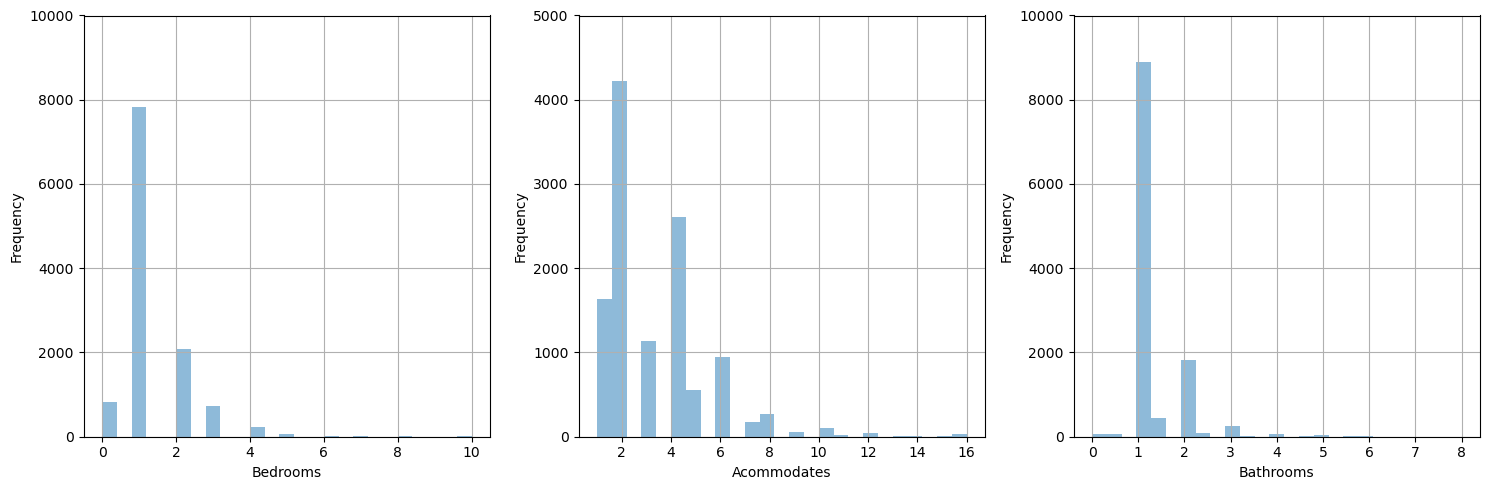

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
house_data['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 10000)
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
house_data['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 5000)
plt.xlabel('Accommodates')

plt.subplot(1,3,3)
house_data['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 10000)
plt.xlabel('Bathrooms')

plt.tight_layout()
plt.show()

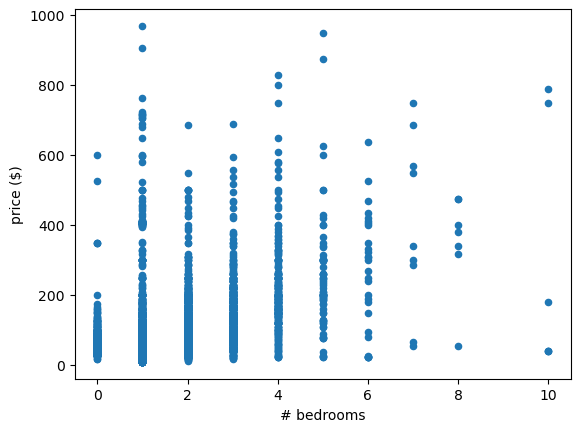

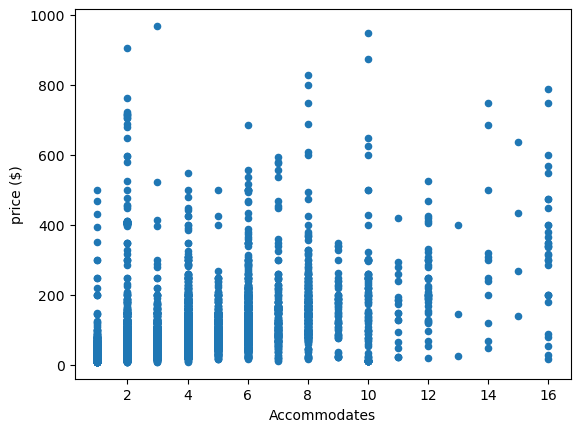

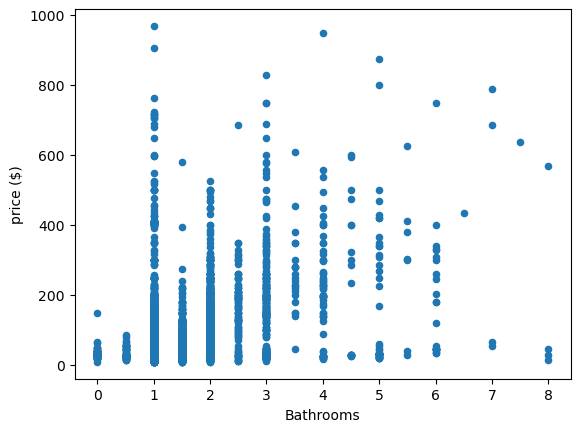

In [38]:
# Sólo representamos 3: Bedrooms, Acommodates y Bathrooms
# el resto se puede repetir una a una

house_data.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

house_data.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('price ($)')
plt.show()

house_data.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('price ($)')
plt.show()

## Análisis de las Visualizaciones

Bedrooms vs. Price
		
*   Tendencia positiva: A medida que aumenta el número de dormitorios, el precio tiende a ser más alto. Esto es lógico, ya que propiedades más grandes suelen tener precios más elevados.
*   Presencia de outliers: Hay algunos valores de Price que son anormalmente altos para un número bajo de Bedrooms, lo que sugiere posibles outliers o propiedades de lujo con precios desproporcionados.

Review Accommodates vs. Price

* 	Relación esperada: A medida que una propiedad puede alojar a más personas, su precio generalmente sube.
*   Alta dispersión: No hay una línea clara que relacione Accommodates con Price, lo que indica que otros factores (ubicación, tipo de propiedad) influyen significativamente en el precio.
*   Algunos valores atípicos: Se observan alojamientos con capacidad alta pero precios sorprendentemente bajos o muy elevados.

Bathrooms vs. Price

*   Tendencia leve: Más baños suelen estar asociados con precios más altos, aunque no de forma tan fuerte como Bedrooms o Accommodates.
*   Distribución más uniforme: Aunque hay dispersión, la relación parece más estable en comparación con Accommodates.
*   Valores extremos: Existen algunas propiedades con muchos baños y precios anormalmente altos, que pueden ser propiedades de lujo o errores en los datos.

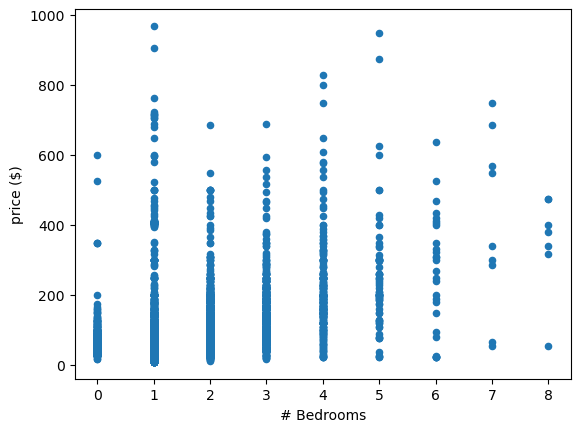

In [39]:
house_data_no_outliers_bedrooms = house_data[house_data['Bedrooms'] <= 8]

house_data_no_outliers_bedrooms.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('price ($)')
plt.show()

In [40]:
print(
    f'Original: {house_data.shape[0]} // '
    f'Modificado: {house_data_no_outliers_bedrooms.shape[0]}\nDiferencia: {house_data.shape[0] - house_data_no_outliers_bedrooms.shape[0]}'
)
print(f'Variación: {((house_data.shape[0] - house_data_no_outliers_bedrooms.shape[0])/house_data.shape[0])*100:2f}%')

Original: 11824 // Modificado: 11818
Diferencia: 6
Variación: 0.050744%


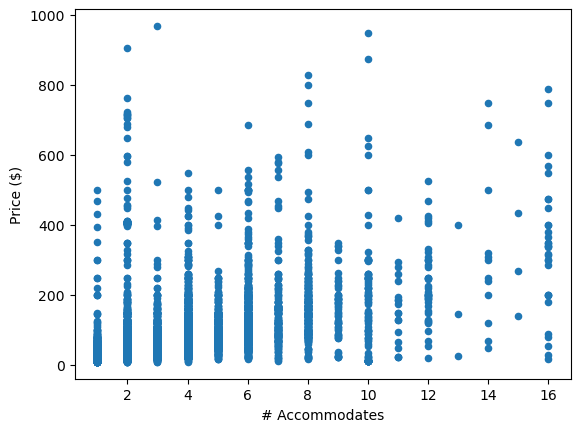

In [46]:

house_data_no_outliers_accommodates = house_data[house_data["Accommodates"] <= 16]

house_data_no_outliers_accommodates.plot(kind="scatter", x="Accommodates", y="Price")
plt.xlabel("# Accommodates")
plt.ylabel("Price ($)")
plt.show()

In [49]:
print(
    f'Original: {house_data.shape[0]} // '
    f'Modificado: {house_data_no_outliers_accommodates.shape[0]}\nDiferencia: {house_data.shape[0] - house_data_no_outliers_accommodates.shape[0]}'
)
print(f'Variación: {((house_data.shape[0] - house_data_no_outliers_accommodates.shape[0])/house_data.shape[0])*100:.2f}%')

Original: 11824 // Modificado: 11824
Diferencia: 0
Variación: 0.00%


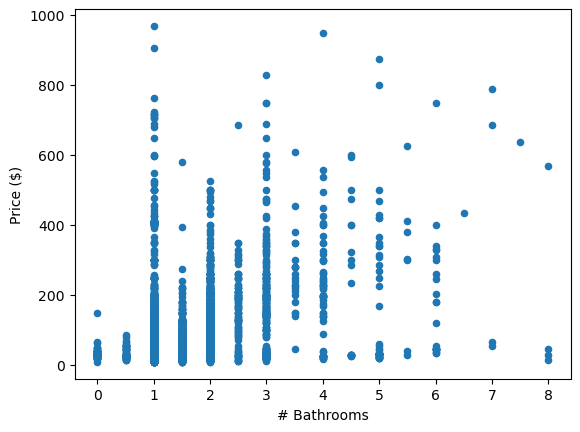

In [51]:
house_data_no_outliers_bathrooms = house_data[house_data["Bathrooms"] <= 8]

house_data_no_outliers_bathrooms.plot(kind="scatter", x="Bathrooms", y="Price")
plt.xlabel("# Bathrooms")
plt.ylabel("Price ($)")
plt.show()

In [52]:
print(
    f'Original: {house_data.shape[0]} // '
    f'Modificado: {house_data_no_outliers_bathrooms.shape[0]}\nDiferencia: {house_data.shape[0] - house_data_no_outliers_bathrooms.shape[0]}'
)
print(f'Variación: {((house_data.shape[0] - house_data_no_outliers_bathrooms.shape[0])/house_data.shape[0])*100:.2f}%')

Original: 11824 // Modificado: 11824
Diferencia: 0
Variación: 0.00%


*    No hay valores extremos que necesiten eliminación.
*    La mejor estrategia es simplemente usar Bathrooms sin eliminar outliers.

In [ ]:
house_data.corr()

,Smart Location,Country Code,Latitude,Longitude,Property Type,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,...,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Room Type_Private room,Room Type_Shared room
Smart Location,1.000000,0.478681,-0.010988,0.013471,0.221592,0.146935,0.176488,0.184166,0.137393,0.280155,...,0.056599,0.021441,0.034994,0.081816,0.003037,-0.008598,-0.012369,0.013918,-0.026283,-0.021396
Country Code,0.478681,1.000000,-0.008652,-0.041371,0.018450,-0.015488,-0.025729,-0.012672,-0.024323,-0.027929,...,0.001736,0.049784,-0.004085,-0.004855,0.018321,0.001679,0.013743,-0.017201,0.005095,0.006416
Latitude,-0.010988,-0.008652,1.000000,-0.493585,-0.017758,0.006899,-0.006339,-0.010066,0.000534,0.006588,...,0.004188,0.022676,0.006321,-0.006468,-0.005675,0.003207,0.010650,-0.009103,-0.001721,-0.082842
Longitude,0.013471,-0.041371,-0.493585,1.000000,-0.007030,0.018478,0.027128,0.039596,0.034312,0.053986,...,-0.012682,0.058478,0.014232,0.016434,-0.053606,-0.004217,-0.003147,0.018225,-0.018341,0.042137
Property Type,0.221592,0.018450,-0.017758,-0.007030,1.000000,0.150563,0.175833,0.196851,0.166494,0.147866,...,0.015677,-0.000485,-0.004547,0.031643,-0.010210,-0.011646,-0.010140,0.016328,-0.048579,-0.058462
Accommodates,0.146935,-0.015488,0.006899,0.018478,0.150563,1.000000,0.432238,0.722825,0.837461,0.444670,...,0.209881,0.001345,0.026951,0.034408,0.000301,-0.025652,-0.036800,0.043011,-0.531884,0.007660
Bathrooms,0.176488,-0.025729,-0.006339,0.027128,0.175833,0.432238,1.000000,0.523241,0.478647,0.525570,...,0.170781,0.006191,0.013966,0.048589,-0.016314,-0.009876,-0.048488,0.051999,-0.025073,-0.001872
Bedrooms,0.184166,-0.012672,-0.010066,0.039596,0.196851,0.722825,0.523241,1.000000,0.728059,0.455824,...,0.131839,0.006825,0.010235,0.043088,-0.016914,-0.019341,-0.073869,0.079263,-0.259026,-0.044870
Beds,0.137393,-0.024323,0.000534,0.034312,0.166494,0.837461,0.478647,0.728059,1.000000,0.411792,...,0.160351,0.003658,0.002981,0.028776,-0.021806,-0.025351,-0.051616,0.062286,-0.351907,0.100894
Square Feet,0.280155,-0.027929,0.006588,0.053986,0.147866,0.444670,0.525570,0.455824,0.411792,1.000000,...,0.086785,-0.034728,NaN,-0.016905,NaN,-0.027817,-0.043136,0.050941,-0.067383,-0.036154


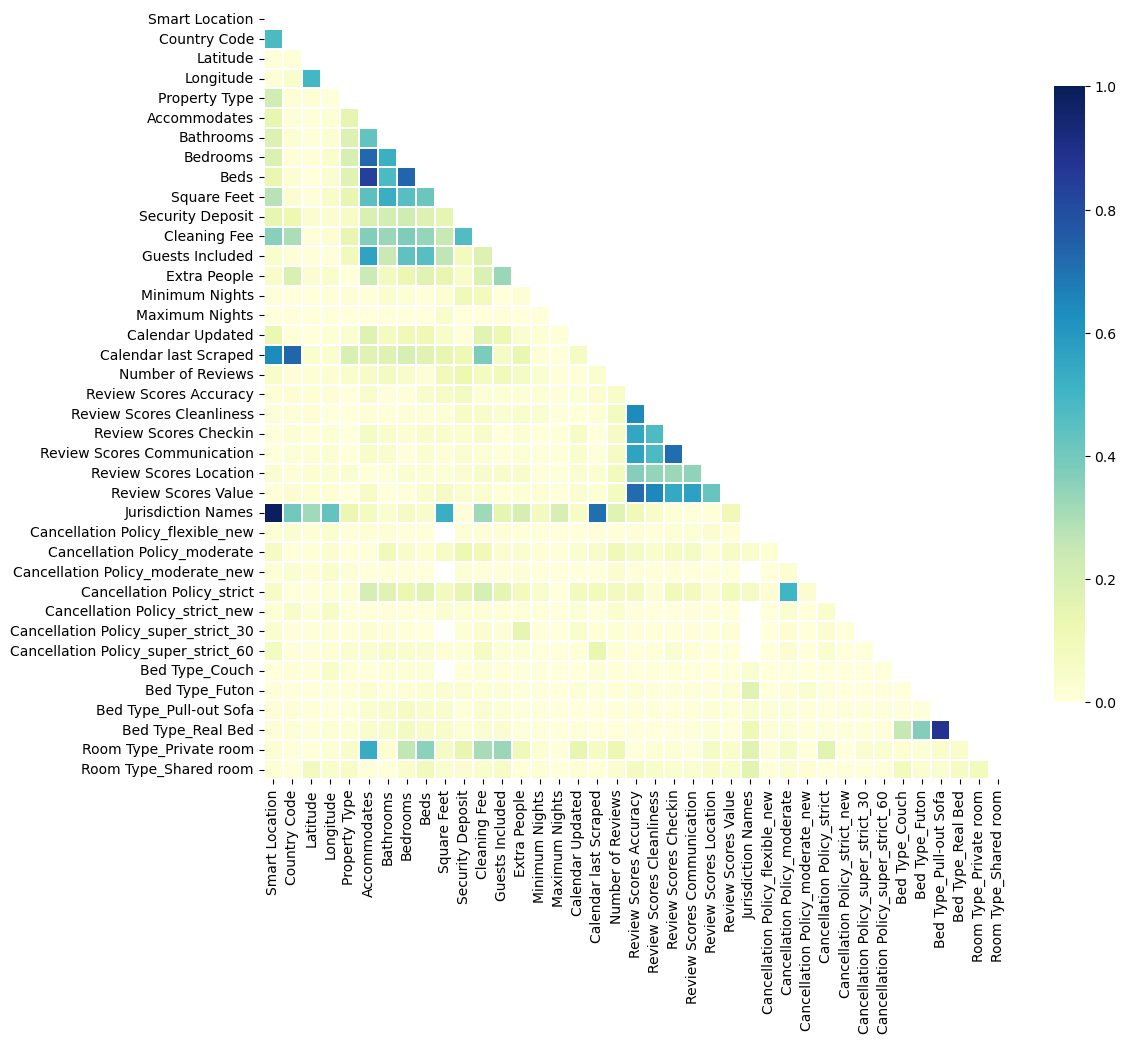

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(house_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

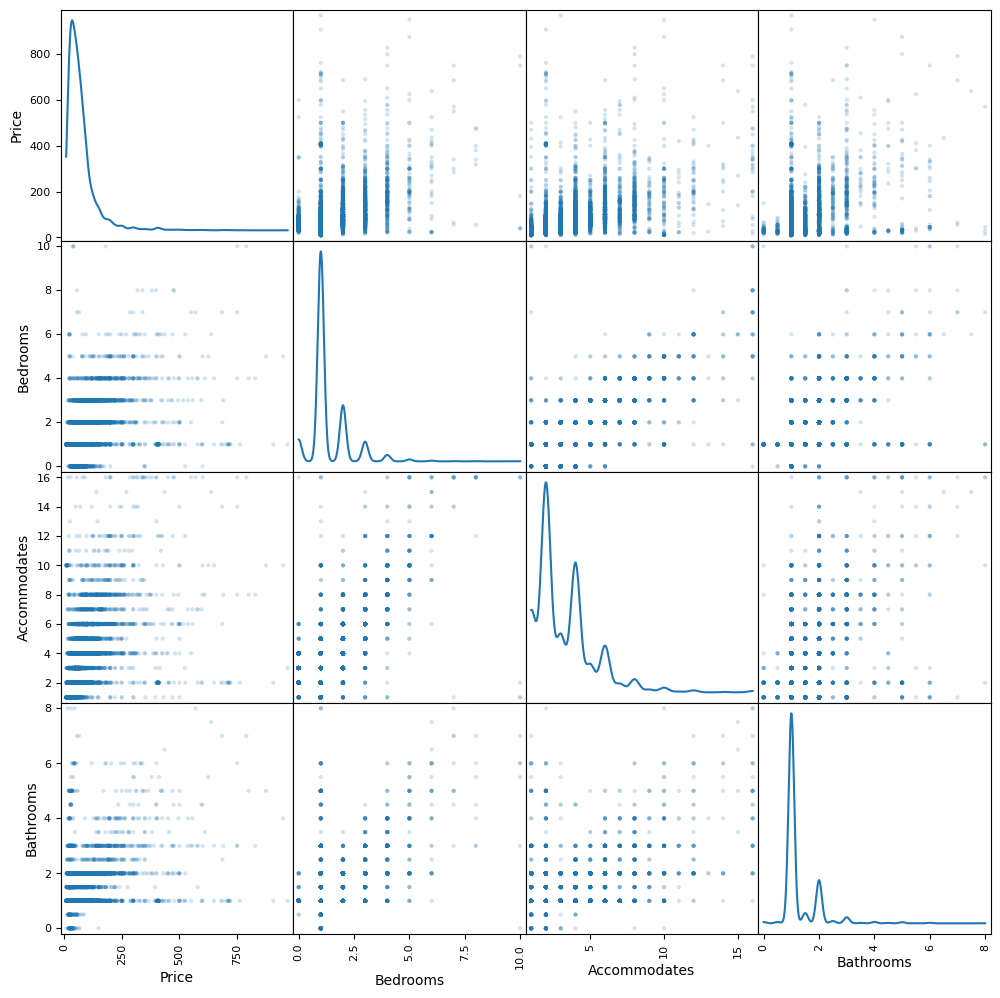

In [54]:

# Seleccionar solo las variables numéricas relevantes
num_vars = ["Price", "Bedrooms", "Accommodates", "Bathrooms"]

# Filtrar el dataset con solo esas columnas
house_data = house_data[num_vars]

# Generar la matriz de gráficos de dispersión
pd.plotting.scatter_matrix(house_data, alpha=0.2, figsize=(12, 12), diagonal='kde')

# Mostrar la visualización
plt.show()

## 5. Modelado, cross-validation y estudio de resultados en train y test

In [59]:
# Carga de datos
house_data = pd.read_csv('./data/airbnb-listings-extract_train.csv', sep=';', decimal='.')

# Imputación

columnas_a_conservar = [
"Smart Location",
"Latitude",
"Longitude",
"Property Type",
"Room Type",
"Accommodates",
"Bathrooms",
"Bedrooms",
"Beds",
"Bed Type",
"Square Feet",
"Price",
"Security Deposit",
"Cleaning Fee",
"Guests Included",
"Extra People",
"Minimum Nights",
"Maximum Nights",
"Calendar Updated",
"Calendar last Scraped",
"Number of Reviews",
"Review Scores Accuracy",
"Review Scores Cleanliness",
"Review Scores Checkin",
"Review Scores Communication",
"Review Scores Location",
"Review Scores Value",
"Jurisdiction Names",
"Cancellation Policy",
"Geolocation"]
house_data = house_data[columnas_a_conservar]

# Eliminamos outliers en bedrooms
house_data = house_data[house_data['Bedrooms'] <= 8]
house_data = house_data[house_data['Accommodates'] <= 16]

In [60]:
# Carga de datos
house_data_test = pd.read_csv('./data/airbnb-listings-extract_test.csv', sep=';', decimal='.')

# Imputación

columnas_a_conservar = [
"Smart Location",
"Latitude",
"Longitude",
"Property Type",
"Room Type",
"Accommodates",
"Bathrooms",
"Bedrooms",
"Beds",
"Bed Type",
"Square Feet",
"Price",
"Security Deposit",
"Cleaning Fee",
"Guests Included",
"Extra People",
"Minimum Nights",
"Maximum Nights",
"Calendar Updated",
"Calendar last Scraped",
"Number of Reviews",
"Review Scores Accuracy",
"Review Scores Cleanliness",
"Review Scores Checkin",
"Review Scores Communication",
"Review Scores Location",
"Review Scores Value",
"Jurisdiction Names",
"Cancellation Policy",
"Geolocation"]

# Eliminamos outliers en bedrooms
house_data_test = house_data_test[house_data_test['Bedrooms'] <= 8]
house_data_test = house_data_test[house_data_test['Accommodates'] <= 16]

In [61]:
from sklearn import preprocessing

# Dataset de train
data_train = house_data.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = house_data_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

In [66]:
print(X_train.dtypes)

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
dtype: object


In [69]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo (Price) y las características (X)
X = house_data.drop(columns=["Price"])  # Asegurar que 'Price' es la variable objetivo
y = house_data["Price"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirmar dimensiones
print(f"✅ X_train: {X_train.shape}, X_test: {X_test.shape}")

✅ X_train: (9438, 29), X_test: (2360, 29)


In [70]:
# Ver qué columnas aún son de tipo 'object'
categorical_columns = X_train.select_dtypes(include=['object']).columns
print("Columnas categóricas en X_train:", list(categorical_columns))

Columnas categóricas en X_train: ['Smart Location', 'Property Type', 'Room Type', 'Bed Type', 'Calendar Updated', 'Calendar last Scraped', 'Jurisdiction Names', 'Cancellation Policy', 'Geolocation']


In [71]:
# Aplicar One-Hot Encoding para variables categóricas con pocas categorías
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurar que ambas matrices tengan las mismas columnas
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

print("✅ Variables categóricas convertidas correctamente")

✅ Variables categóricas convertidas correctamente


In [72]:
# Mantener solo columnas numéricas en X_train y X_test
X_train = X_train.select_dtypes(include=["number"])
X_test = X_test.select_dtypes(include=["number"])

# Verificar que ahora solo haya números
print(X_train.dtypes)

Latitude                       float64
Longitude                      float64
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Square Feet                    float64
Security Deposit               float64
Cleaning Fee                   float64
Guests Included                  int64
Extra People                     int64
Minimum Nights                   int64
Maximum Nights                   int64
Number of Reviews                int64
Review Scores Accuracy         float64
Review Scores Cleanliness      float64
Review Scores Checkin          float64
Review Scores Communication    float64
Review Scores Location         float64
Review Scores Value            float64
dtype: object


In [77]:
from sklearn.preprocessing import StandardScaler
# Asegurar que X_train y X_test tengan las mismas columnas después del encoding
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

print("✅ X_train y X_test ahora tienen las mismas columnas")

# Asegurar que solo haya valores numéricos antes de escalar
X_train = X_train.select_dtypes(include=["number"])
X_test = X_test.select_dtypes(include=["number"])

# Aplicar StandardScaler
scaler = StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

print("✅ Escalado completado sin errores")

✅ X_train y X_test ahora tienen las mismas columnas
✅ Escalado completado sin errores
